Nama : Muhammad Nur Rachman Nidhi Suryono
<br>
Email : naudhi153@gmail.com
<br>
Surabaya, 13 November 2023
<br>
LinkedIn : [LinkedIn Link](https://www.linkedin.com/in/muhammad-nur-rachman-n-s/)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

%matplotlib inline
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget --no-check-certificate \
  "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip" \
    -O "/content/rockpaperscissors.zip"


In [ ]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
paper_folder = os.path.join('/content/rockpaperscissors/paper')
rock_folder = os.path.join('/content/rockpaperscissors/rock')
scissors_folder = os.path.join('/content/rockpaperscissors/scissors')

In [ ]:
train_dir = os.path.join("/content/rockpaperscissors/rps-cv-images/")

In [ ]:
# Create image data generators for training and validation sets
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

# Load training and validation data from directories
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAccuracy has reached 0.96")
      self.model.stop_training=True

callbacks=myCallbacks()

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.4),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    batch_size=15,
                    validation_data=validation_generator,
                    validation_steps=5,
                    callbacks=[callbacks]
                    )

Epoch 1/20
42/42 [==============================] - 16s 285ms/step - loss: 1.2842 - accuracy: 0.3562 - val_loss: 1.0671 - val_accuracy: 0.5063
Epoch 2/20
42/42 [==============================] - 13s 310ms/step - loss: 1.0116 - accuracy: 0.4863 - val_loss: 0.9870 - val_accuracy: 0.4875
Epoch 3/20
42/42 [==============================] - 13s 307ms/step - loss: 0.9168 - accuracy: 0.5662 - val_loss: 0.9697 - val_accuracy: 0.4750
Epoch 4/20
42/42 [==============================] - 14s 339ms/step - loss: 0.8474 - accuracy: 0.6301 - val_loss: 0.7454 - val_accuracy: 0.7250
Epoch 5/20
42/42 [==============================] - 13s 301ms/step - loss: 0.6866 - accuracy: 0.7070 - val_loss: 0.5717 - val_accuracy: 0.7625
Epoch 6/20
42/42 [==============================] - 13s 301ms/step - loss: 0.5993 - accuracy: 0.7519 - val_loss: 0.6076 - val_accuracy: 0.7563
Epoch 7/20
42/42 [==============================] - 13s 310ms/step - loss: 0.5603 - accuracy: 0.7702 - val_loss: 0.5030 - val_accuracy: 0.8188

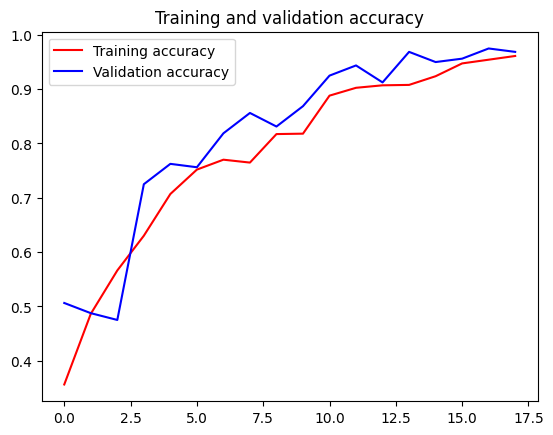

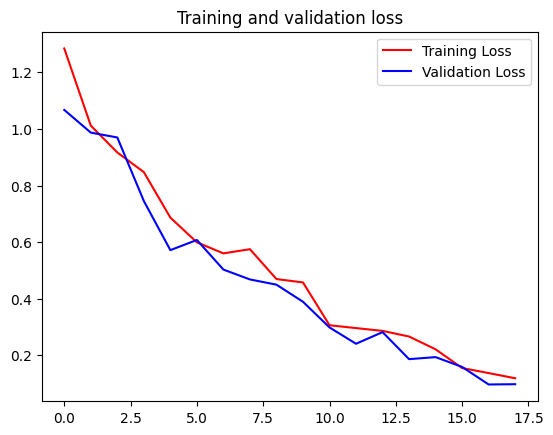

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving download.jpeg to download (5).jpeg
1/1 [==============================] - 0s 18ms/step
Gunting


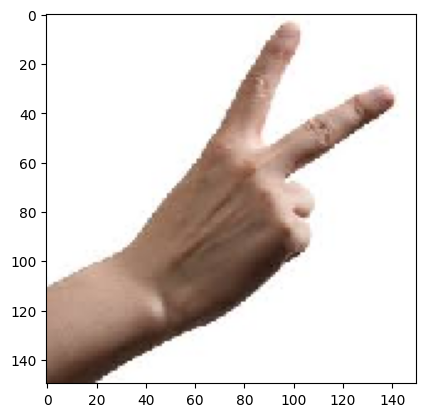

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0,0]!=0:
    print('Gunting')
  elif classes[0,1]!=0:
    print('Batu')
  else:
    print('Kertas')